In [1]:
# Here I'm trying to train model

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
data1=pd.read_csv("E:\\Data Mites\\MyProject\\IABAC Project\\ProjectDir\\data\\processed\\DummiesFile.csv")

In [4]:
# creating data into x and y
x=data1.drop('PerformanceRating',axis=1)
y=data1[['PerformanceRating']]

In [5]:
# creating data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

### PCA
   - Use Case: PCA can be used as part of the modeling process to reduce overfitting and improve the generalization performance of the model.
   - Steps: Apply PCA to the training data before fitting the model. This can help reduce the dimensionality of the feature space and remove noise or irrelevant features.

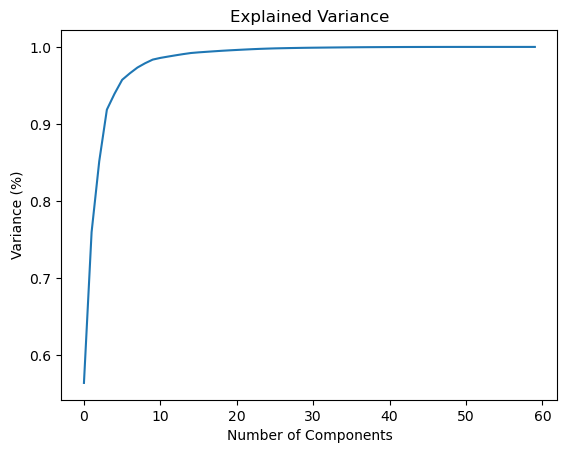

In [6]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

### Dicesion Tree Algorithm

In [7]:
## Balacing the data
# SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in machine learning datasets. It's commonly applied to classification problems where one class (the minority class) is significantly underrepresented compared to another class (the majority class).
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [8]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({'PerformanceRating': 1})
after smote Counter({'PerformanceRating': 1})


In [9]:
# creating decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier() # model 
dtree.fit(x_smote,y_smote)
y_predic=dtree.predict(x_test)

In [10]:
y_train_predict=dtree.predict(x_train)#predicting training data to check training performance 
print("This is train model of Decision Tree",y_train_predict)

This is train model of Decision Tree [4 3 2 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 2 2 3 4 3 2 3 3 4 3 3 4 3
 3 3 3 3 3 3 3 2 3 3 4 2 3 2 3 3 4 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 2 2 2 3 3 4 2 2 2 3 4 4 2 3 3 3 3
 3 3 3 2 2 2 3 3 2 2 3 3 4 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3
 3 3 3 4 3 3 2 2 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 2 4 3 2 3 2 3 3 4 2 2 2 3 3 3 3 3 2 3 3 3 3 2 3 4 2 3 2 4 3 3
 2 3 3 4 2 3 3 2 3 3 3 2 3 3 3 3 2 3 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 4 2
 4 3 3 3 3 3 3 3 3 2 3 4 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 4 2 4 3 2
 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 2 3 4 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 4 2 3 3 3 2 4 3 4 3 2 2 4 3 3 3 3 3 3 3 3 3 3 3 2 4 3 2 4
 2 3 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3 3 2 3 3 4 3 3 3 2 2 3 2 4 4 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 4 2 4 2 3 2 2 4 2 3
 3 3 3 2 2 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 4 2 2 3 3 4 2 2 3 3 

### Random Forest Algorithm

In [11]:
# creating
from sklearn.ensemble import RandomForestClassifier
RForest=RandomForestClassifier()
RForest.fit(x_smote,y_smote)
y_pred=RForest.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy_score(y_test,y_pred)

0.9305555555555556

### HyperParameter Tunning For Random Forest

In [13]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [14]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False})


In [15]:
rf_clf2 = RandomForestClassifier(n_estimators= 100, min_samples_split=2, min_samples_leaf= 1, max_features='auto', max_depth=20, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [16]:
# training accuracy
y_train_pred=rf_clf2.predict(x_train)
print("This is train model of Random Forest ",y_train_pred)

This is train model of Random Forest  [4 3 2 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 2 2 3 4 3 2 3 3 4 3 3 4 3
 3 3 3 3 3 3 3 2 3 3 4 2 3 2 3 3 4 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 2 2 2 3 3 4 2 2 2 3 4 4 2 3 3 3 3
 3 3 3 2 2 2 3 3 2 2 3 3 4 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3
 3 3 3 4 3 3 2 2 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 2 4 3 2 3 2 3 3 4 2 2 2 3 3 3 3 3 2 3 3 3 3 2 3 4 2 3 2 4 3 3
 2 3 3 4 2 3 3 2 3 3 3 2 3 3 3 3 2 3 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 4 2
 4 3 3 3 3 3 3 3 3 2 3 4 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 4 2 4 3 2
 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 2 3 4 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 4 2 3 3 3 2 4 3 4 3 2 2 4 3 3 3 3 3 3 3 3 3 3 3 2 4 3 2 4
 2 3 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3 3 2 3 3 4 3 3 3 2 2 3 2 4 4 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 4 2 4 2 3 2 2 4 2 3
 3 3 3 2 2 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 4 2 2 3 3 4 2 2 3 3

### Supper Vectore Machine Algorithm

In [17]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [18]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

In [19]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

In [20]:
#grid search CV
from sklearn.model_selection import GridSearchCV

# define hyperparameter range 
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,5))}

model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.6s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   2.6s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   2.5s
[CV] END .....................C=0.1, gamma=1, 

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4]},
             scoring='f1', verbose=2)

In [21]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [22]:
model=SVC(C=70,gamma=0.01,random_state=1)
model.fit(x_smote,y_smote)

SVC(C=70, gamma=0.01, random_state=1)

In [23]:
y_pred=model.predict(x_train)


In [25]:
print("This is train model of Supper Vector Machine",y_pred)

This is train model of Supper Vector Machine [4 3 2 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 2 2 3 4 3 2 3 3 4 3 3 4 3
 3 3 3 3 3 3 3 2 3 3 4 2 3 2 3 3 4 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 2 2 2 3 3 4 2 2 2 3 4 4 2 3 3 3 3
 3 3 3 2 2 2 3 3 2 2 3 3 4 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3
 3 3 3 4 3 3 2 2 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 2 4 3 2 3 2 3 3 4 2 2 2 3 3 3 3 3 2 3 3 3 3 2 3 4 2 3 2 4 3 3
 2 3 3 4 2 3 3 2 3 3 3 2 3 3 3 3 2 3 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 4 2
 4 3 3 3 3 3 3 3 3 2 3 4 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 4 2 4 3 2
 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 2 3 4 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 4 2 3 3 3 2 4 3 4 3 2 2 4 3 3 3 3 3 3 3 3 3 3 3 2 4 3 2 4
 2 3 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3 3 2 3 3 4 3 3 3 2 2 3 2 4 4 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 4 2 4 2 3 2 2 4 2 3
 3 3 3 2 2 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 4 2 2 3 3 4 

### Gradient Boosting Algorithm

In [26]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
GradientB=GradientBoostingClassifier() ## object creation
y_train_GB=GradientB.fit(x_train,y_train) ## fitting the data


In [27]:
print("This is train model of Gradient Boosting Algorithm",y_train)

This is train model of Gradient Boosting Algorithm       PerformanceRating
1103                  4
367                   3
250                   2
308                   3
295                   3
...                 ...
466                   2
299                   3
493                   2
527                   4
1192                  4

[840 rows x 1 columns]


### K-neighbour (KNN)

In [28]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create empty list to store error values
error_rate = []

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    
    # Convert y_test to Series and then apply .ravel()
    error_rate.append(np.mean(y_pred != y_test.iloc[:, 0].ravel()))  # Assuming the target column is the first column

error_rate

[0.36666666666666664,
 0.3972222222222222,
 0.33055555555555555,
 0.33611111111111114,
 0.2861111111111111,
 0.28888888888888886,
 0.275,
 0.28888888888888886,
 0.275,
 0.275]

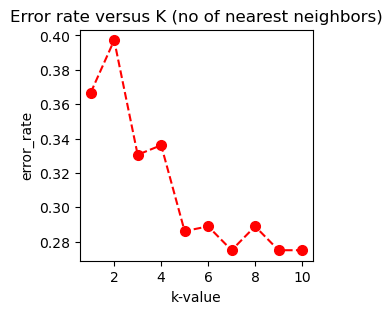

In [29]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=7)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [30]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create empty list to store error values
error_rate = []

for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    
    # Convert y_test to Series and then apply .ravel()
    error_rate.append(np.mean(y_pred != y_test.iloc[:, 0].ravel()))  # Assuming the target column is the first column

error_rate

[0.36666666666666664,
 0.3972222222222222,
 0.33055555555555555,
 0.33611111111111114,
 0.2861111111111111,
 0.28888888888888886,
 0.275,
 0.28888888888888886,
 0.275,
 0.275]

In [31]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_predi=knn_model.predict(x_train)

In [32]:
print("This is train model of KNN",y_predi)

This is train model of KNN [4 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 2 2 3 3 3 3 3 3 4 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 4 3 3
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 4 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 2 3 2 3 3 3 3 3 3 3 2 

### Using Deep Learning

In [33]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
sclaed_x=sc.fit_transform(x) ## transforming the data
X = pd.DataFrame(sclaed_x,columns=x.columns) ##converting the arrays

### ANN (Artificial Neural Network)

In [34]:
## model creation
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
ANN.fit(x_train,y_train) ## training the data
y_predict_proba = ANN.predict_proba(x_test) ## predicting the pro
## bability of class
y_predict = ANN.predict(x_test)
y_train_predictANN = ANN.predict(x_train)

In [35]:
print("This is train model of KNN",y_train_predictANN)

This is train model of KNN [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [37]:

Train_model = [y_train_predict,y_train_pred,y_pred,y_train,y_predi,y_train_predictANN]
algorithms = ["Decision Tree","Random Forest","Supper Vector Machine","Gradient Boosting","K-Nearest Neighbors","Artificial Nueral Network"]    

for i in range(len(algorithms)):
    print("The train moled score achieved using "+algorithms[i]+" is: "+str(Train_model[i])+" %")

The train moled score achieved using Decision Tree is: [4 3 2 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 2 2 3 4 3 2 3 3 4 3 3 4 3
 3 3 3 3 3 3 3 2 3 3 4 2 3 2 3 3 4 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 2 2 2 3 3 4 2 2 2 3 4 4 2 3 3 3 3
 3 3 3 2 2 2 3 3 2 2 3 3 4 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3
 3 3 3 4 3 3 2 2 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 2 4 3 2 3 2 3 3 4 2 2 2 3 3 3 3 3 2 3 3 3 3 2 3 4 2 3 2 4 3 3
 2 3 3 4 2 3 3 2 3 3 3 2 3 3 3 3 2 3 4 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 4 2
 4 3 3 3 3 3 3 3 3 2 3 4 3 3 3 3 3 3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 4 2 4 3 2
 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 2 3 4 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 4 2 3 3 3 2 4 3 4 3 2 2 4 3 3 3 3 3 3 3 3 3 3 3 2 4 3 2 4
 2 3 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3 3 2 3 3 4 3 3 3 2 2 3 2 4 4 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 4 2 4 2 3 2 2 4 2 3
 3 3 3 2 2 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 4 

### For More deatail open reference directory